In [1]:
%load_ext jupyter_ai

In [3]:
######################################
# Load the Data and create differences
######################################

import re
with open("/Users/evanthomas/github.com/ethomas2/advent-of-code-2023/scrap/output", "r") as file:
    lines = file.readlines()

lines = [line.strip() for line in lines]
lines = [line for line in lines if 'order' in line]
assert(len(lines) == 3)
# pprint.pprint(lines)

pattern = r"(\d+).. order \[(.*?)\]"
matches = [re.search(pattern, line) for line in lines]
assert all(m is not None for m in matches)

orders = [m.group(1) for m in matches]
items2d = [[int(x) for x in m.group(2).split(", ")] for m in matches]
# for _ in range(5):
#     items2d.append([x2 - x1 for (x1, x2) in zip(items2d[-1], items2d[-1][1:])])

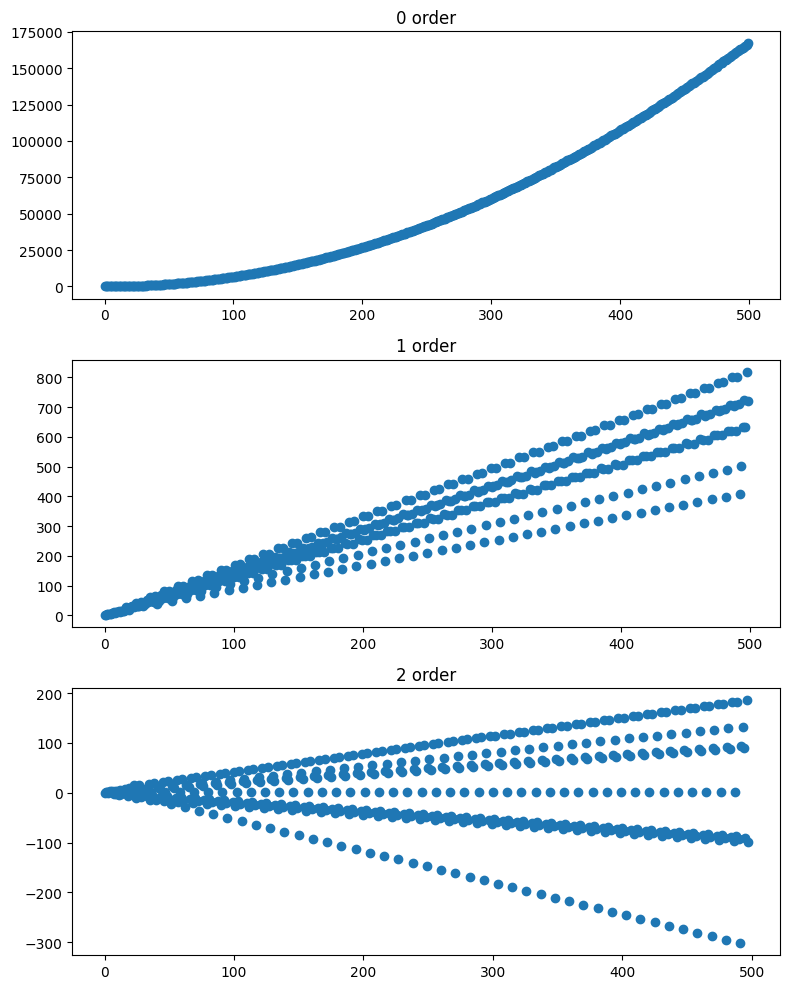

In [4]:
###############
# Plot the data
###############

import matplotlib.pyplot as plt


# Create a grid of subplots
fig, axs = plt.subplots(len(items2d), 1, figsize=(8, 10))

for i, items in enumerate(items2d):
    axs[i].scatter(range(len(items)), items)
    axs[i].set_title(f'{i} order')

plt.tight_layout()
plt.show()

In [75]:

def all_equal(arr):
    return all(arr[0] == x for x in arr)

def skip_sequence(arr, skip):
    return [arr[k] for k in range(0, len(arr), skip)]

def diff_list(arr):
    return [x2 - x1 for (x1, x2) in zip(arr, arr[1:])]

def is_linear_sequence(sequence):
    assert len(sequence) > 1, f'{sequence} has length {len(sequence)}'
    return all_equal(diff_list(sequence))

def find_linear_period(arr):
    period_max = min(15, len(arr) // 2)
    for period in range(1, period_max):
        if is_linear_sequence(skip_sequence(arr, period)):
            return period
    return None

def intersperse(*args):
    arr = []
    for i in range(len(args[0])):
        for x in args:
            arr.append(x[i])
    return arr
    
def test():
    N = 10
    arr1, arr2, arr3 = [
        [5*x - 12 for x in range(N)],
        [3*x + 2 for x in range(N)],
        [2*x - 3 for x in range(N)]
    ]
    arr = intersperse(arr1, arr2, arr3)
    print(find_linear_period(arr))
    print(skip_sequence(arr, 3))

def _abandoned_code():
    arr = items2d[1]
    for i in arr:
        period = find_linear_period(arr)
        if period is not None:
            print(i, period, skip_sequence(arr[i:], period))
            break



In [87]:
x = np.array([1, 2, 5, 7, 9, 9, 14, 20])
y_data = 3*x**2 -2*x + 5

coefficients = np.polyfit(x_data, y_data, 2)

coefficents
np.poly1d(coefficents)(x) - y_data

array([0, 0, 0, 0, 0, 0, 0, 0])

In [136]:
arr0 = items2d[0]
print(f'{len(arr0)=}')

start = 103
for n in range(1, 150):
    skip_list = arr0[start::n]
    assert len(skip_list) >= 3 # make sure there's enough data in teh skip list to be confident the fit isn't accidental

    xcoords = list(range(len(skip_list))) # np.arange(0, len(skip_list))
    coefficents = np.polyfit(xcoords, skip_list, 2).astype(int)
    p = np.poly1d(coefficents)
    is_perfect = np.all(p(xcoords) == skip_list)

    if is_perfect:
        print('is perfect', n, len(skip_list), is_perfect)
    

    

len(arr0)=500
is perfect 11 37 True
is perfect 33 13 True


In [212]:
# N = 26501365
# Let skiplist(k, n) be the skip list starting at k skipping every n numbers
# Find numbers (k, n) st 
# N - k = 0   mod n   (So N is in skiplist(k, n))
# there exists a perfect fit polynomial P = polyfit(..., skiplist(k, n)) 
# compute P((N - k) / n)

sample_file = "/Users/evanthomas/github.com/ethomas2/advent-of-code-2023/scrap/output-for-sample-input"
real_file = "/Users/evanthomas/github.com/ethomas2/advent-of-code-2023/scrap/real-output"
fname = real_file
with open(real_file, "r") as f:
    # Add a dummy value so it's effectively 1 indexed. We want arr[6] = 16 for the sample_file
    arr0 = [0] + [int(x.strip()) for x in f.read().split(',')]
    if fname == sample_file:
        assert arr0[6] == 16 and arr0[10] == 50 and arr0[50] == 1594, (arr0[6], arr0[10], arr0[50])


# For sample_file find k in [2, 150), n in [2, 100)
# It always finds n is a multiple of 11, which is suspcious because the grid is 11 X 11
N = 26501365

# for k in range(2, 150):
#     for n in range(2, 100):
for k in range(2, 1000):
     for n in range(2, 200):
        if (N - k) % n != 0:
            continue # gotta be a better way of doing this
        # print(f'trying {k=} {n=}')
        skip_list = arr0[k::n]
        assert len(skip_list) >= 4, 'skip list must be >= 4'

        xcoords = list(range(len(skip_list))) # np.arange(0, len(skip_list))
        coefficents = np.polyfit(xcoords, skip_list, 2).astype(int)
        P = np.poly1d(coefficents)
        is_perfect = np.all(P(xcoords) == skip_list)
        if is_perfect:
            print('prediction', k, n, (N - k) // n, P((N - k) // n))

prediction 327 131 202298 629720570456311
